In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *

In [2]:
x = Symbol('x')
f1_exp = 1/(1+exp(-x))
f2_exp = x
f1_prime_exp = diff(f1_exp)
f2_prime_exp = diff(f2_exp)
f1 = lambdify(x,f1_exp)
f2 = lambdify(x,f2_exp)
f1_prime = lambdify(x,f1_prime_exp)
f2_prime = lambdify(x,f2_prime_exp)
Tf_list = [f1,f2]
F_prime = [f1_prime,f2_prime]

In [3]:
def Z_op(X,W,B):
    Z = np.dot(W,X.T) + B
    return Z

In [4]:
def Y_op(Tf,*Z):
    Yout = []
    for z in Z:
        y = Tf(z)
        Yout.append(y)
    return np.array(Yout)


In [5]:
def Cost(Y,T):
    errors = T - Y
    SSE = 0
    for error in errors:
        SSE = SSE + error*error
    MSE = SSE/len(errors)
    return MSE


In [6]:
def feed_forward(W,B,X,Tf_list):
    Z_list = []
    X_list = []
    X_list.append(X)
    for i,j,k in zip(range(len(W)),range(len(B)),range(len(Tf_list))):
        z = Z_op(X,W[i],B[j])
        Z_list.append(z)
        y = Y_op(Tf_list[k],z)
        X = y
        X_list.append(X)
    return Z_list,X_list

    

In [7]:
w1 = np.array([[0.2,0.4 , -0.5], 
    [-0.3, 0.1, 0.2]])
w2 = np.array([-0.3,-0.2])
W = [w1,w2]
X = np.array([1,0,1])
b1 = np.array([-0.4,0.2])
b2 = np.array([0.1])
B = [b1,b2]
alpha = 0.9
Target = np.array([1])
print(W)
print(B)
print(Target)
print(X)

[array([[ 0.2,  0.4, -0.5],
       [-0.3,  0.1,  0.2]]), array([-0.3, -0.2])]
[array([-0.4,  0.2]), array([0.1])]
[1]
[1 0 1]


In [8]:
def sensitivity(Z_list,X_list,F_prime,Target,Weights):
    F_list = []
    Sn_list = []
    for i in range(len(Z_list)):
        D = []
        for k in Z_list[i]:
            d = F_prime[i](k)
            D.append(d)
        Dag = np.array(D)
        F_dot = np.diag(Dag)
        F_list.append(F_dot)
    F_n = F_list.pop(len(F_list)-1)
    A_n = X_list.pop(len(X_list)-1)
    error = Target - A_n
    S_n = np.array(-2*np.dot(F_n,error.T))
    Sn_list.append(S_n)
    for i in range(len(F_list),0,-1):
        F_dot_W = np.array(np.dot(F_list[i-1],Weights[i].T))
        S_n = F_dot_W*S_n
        Sn_list.append(S_n.T)
    return Sn_list


In [9]:
def weight_bias_updation(Weight,Bias,Alpha,Sensitivity,X_List):
    new_weights = []
    new_bias = []
    def reshaping(vector):
        if vector.shape == (len(vector),1):
            return vector.reshape(len(vector),)
        else :
            return vector
    def Reverse(lst):
        return [ele for ele in reversed(lst)]
    sens = Reverse(Sensitivity)

    for i in range(len(Weight)):
        delta_w = reshaping(Alpha*sens[i]*X_List[i].T)
        w = Weight[i] - delta_w #As a(1) = X[0], The loop will run for w[0],w[1]...w[n-1], which we will use as w1,w2...wn
        new_weights.append(w)
    for i in range(len(Bias)):
        b = Bias[i] - reshaping(Alpha*sens[i])
        new_bias.append(b)
    return new_weights,new_bias

In [21]:
def Error_Collection(Target,Output,All_Errors):
  Error = Cost(Output,Target)
  All_Errors.append(Error)

In [34]:
def backpropagation(Weight,Bias,Pattern,Target,Alpha,Transfer_Function,F_Prime,Epoch):
    all_errors = []
    epoch_list = []
    for i in range(Epoch):
        zl,xl = feed_forward(Weight,Bias,Pattern,Transfer_Function)
        actual_output = xl[len(xl)-1]
        Error_Collection(Target,actual_output,all_errors)
        sen = sensitivity(zl,xl,F_prime,Target,Weight)
        Weight,Bias = weight_bias_updation(Weight,Bias,alpha,sen,xl)
        epoch_list.append(i+1)
    plt.scatter(epoch_list,all_errors)
    plt.xlabel('Number of Epoch')
    plt.ylabel('Mean Square Error')
    plt.grid()
        

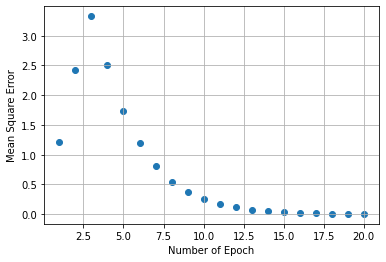

In [36]:
backpropagation(W,B,X,Target,alpha,Tf_list,F_prime,20)